### 1. Постановка задачи.

Процесс передачи тепла в твердом веществе описывается уравнением теплопроводности
$$ \qquad \qquad \qquad \rho C \frac{\partial T}{\partial t} - \text{div}\left[ k\text{grad}(T)\right] = Q, \qquad \qquad \qquad \text{(1)} $$
где $ \rho $ и $ C $ - плотность и теплоемкость вещества, $ T $ - температура, $ k $ - коэффициент теплопроводности, $ Q $ - плотность источников тепла.

Рассчитайте процесс изменения температурного распределения $ T(x, t) $ в стержне при указанных в таблице данных.    
Длина стержня $ L = 1 $ м.    
Значения температуры на левом и правом концах соответственно $ T(x=0) = T_0 $ и $ T(x=L) = T_L $.    
Объемные источники тепла отсутствуют: $ Q = 0 $.

| Параметр | Значение |
|:--------:|:--------:|
| $ \rho, \frac{кг}{м^3} $ | $2.8\cdot10^3$ |
| $ C, \frac{Дж}{кг*К} $ | $880$ |
| $ k, \frac{Вт}{м*К} $ | $75$ |
| $ T_0, \circ C $ | $0$ |
| $ T_L, \circ C $ | $100$ |

### 2. Необходимый теоретический материал.

Дано уравнение теплопроводности. Необходимо рассчитать процесс изменения температурного распределения в стержне. Направив ось $Ox$ вдоль стержня, можем считать, что температура вдоль осей $Oy$ и $Oz$ - постоянная величина, в связи чем задача становится одномерной, и исходное уравнение с учетом данных в задании значений примет вид: $$ \qquad \qquad \qquad \rho C \frac{\partial T}{\partial t} = k \frac{\partial^2 T}{\partial x^2}, \quad 0 < x < L \qquad \qquad \qquad \text{(2)}$$
Начальные и граничные условия запишутся следующим образом:
$$ T(x, 0) = \varphi (x),\quad 0 \leq x \leq L $$
$$ \qquad \qquad \qquad T(0, t) = T_0,\quad t > 0 \qquad \qquad \qquad \text{(3)} $$
$$ T(L, t) = T_L,\quad t > 0 $$
Эту задачу в полной математической постановке будем решать методом конечных разностей на равномерной сетке. Для этого разобьем
пластину по толщине на $N–1$ равных промежутков, т. е. построим конечно-разностную сетку:

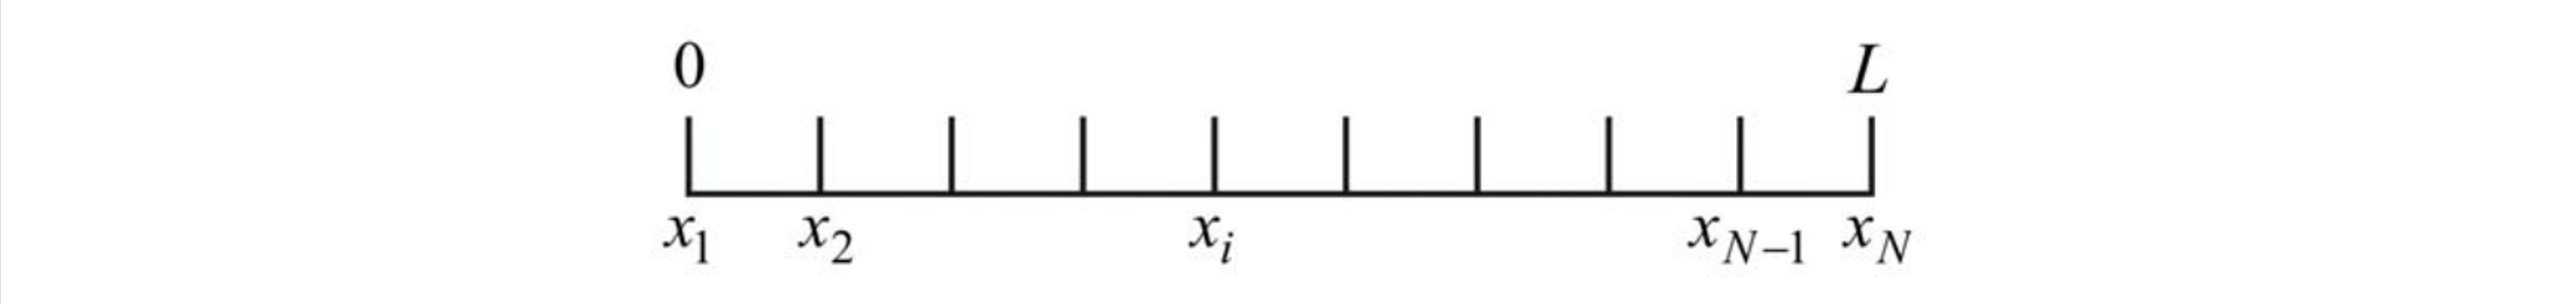
$$ \text{Рис. 1. Конечно-разностная сетка.} $$
$$ x_2, x_3, ..., x_{N-1}\text{ - координаты внутренних узлов.} $$
$$ x_1, x_N\text{ - координаты граничных узлов.} $$

Определим значение температуры в $i$-ом узле в момент времени $ t = t_n = n \cdot \tau $ как $ T(x_i, t_n) = T_i^n $. Здесь $\tau$ - шаг интегрирования по временной координате, $n$ - номер шага по времени.

Далее заменим дифференциальные операторы в формуле на их конечно-разностные аппроксимации по неявной схеме:
$$ \frac{\partial T}{\partial t} = \frac{T_i^{n+1} - T_i^n}{\tau} $$
$$ \frac{\partial^2 T}{\partial x^2} = \frac{T_{i+1}^{n+1} - 2T_i^{n+1} + T_{i-1}^{n+1}}{h^2} $$

И обозначим величину:
$$ \frac{k}{\rho C} = \lambda $$

В результате получаем следующую СЛАУ:
$$ \qquad \qquad \qquad \frac{T_i^{n+1} - T_i^n}{\tau} = \lambda \cdot \frac{T_{i+1}^{n+1} - 2T_i^{n+1} + T_{i-1}^{n+1}}{h^2}\text{, } i=2, ..., N-1\text{, } n \geq 0 \qquad \qquad \qquad \text{(4)} $$

Выбранную схему аппроксимации частных производных можно графически представить следующим образом:

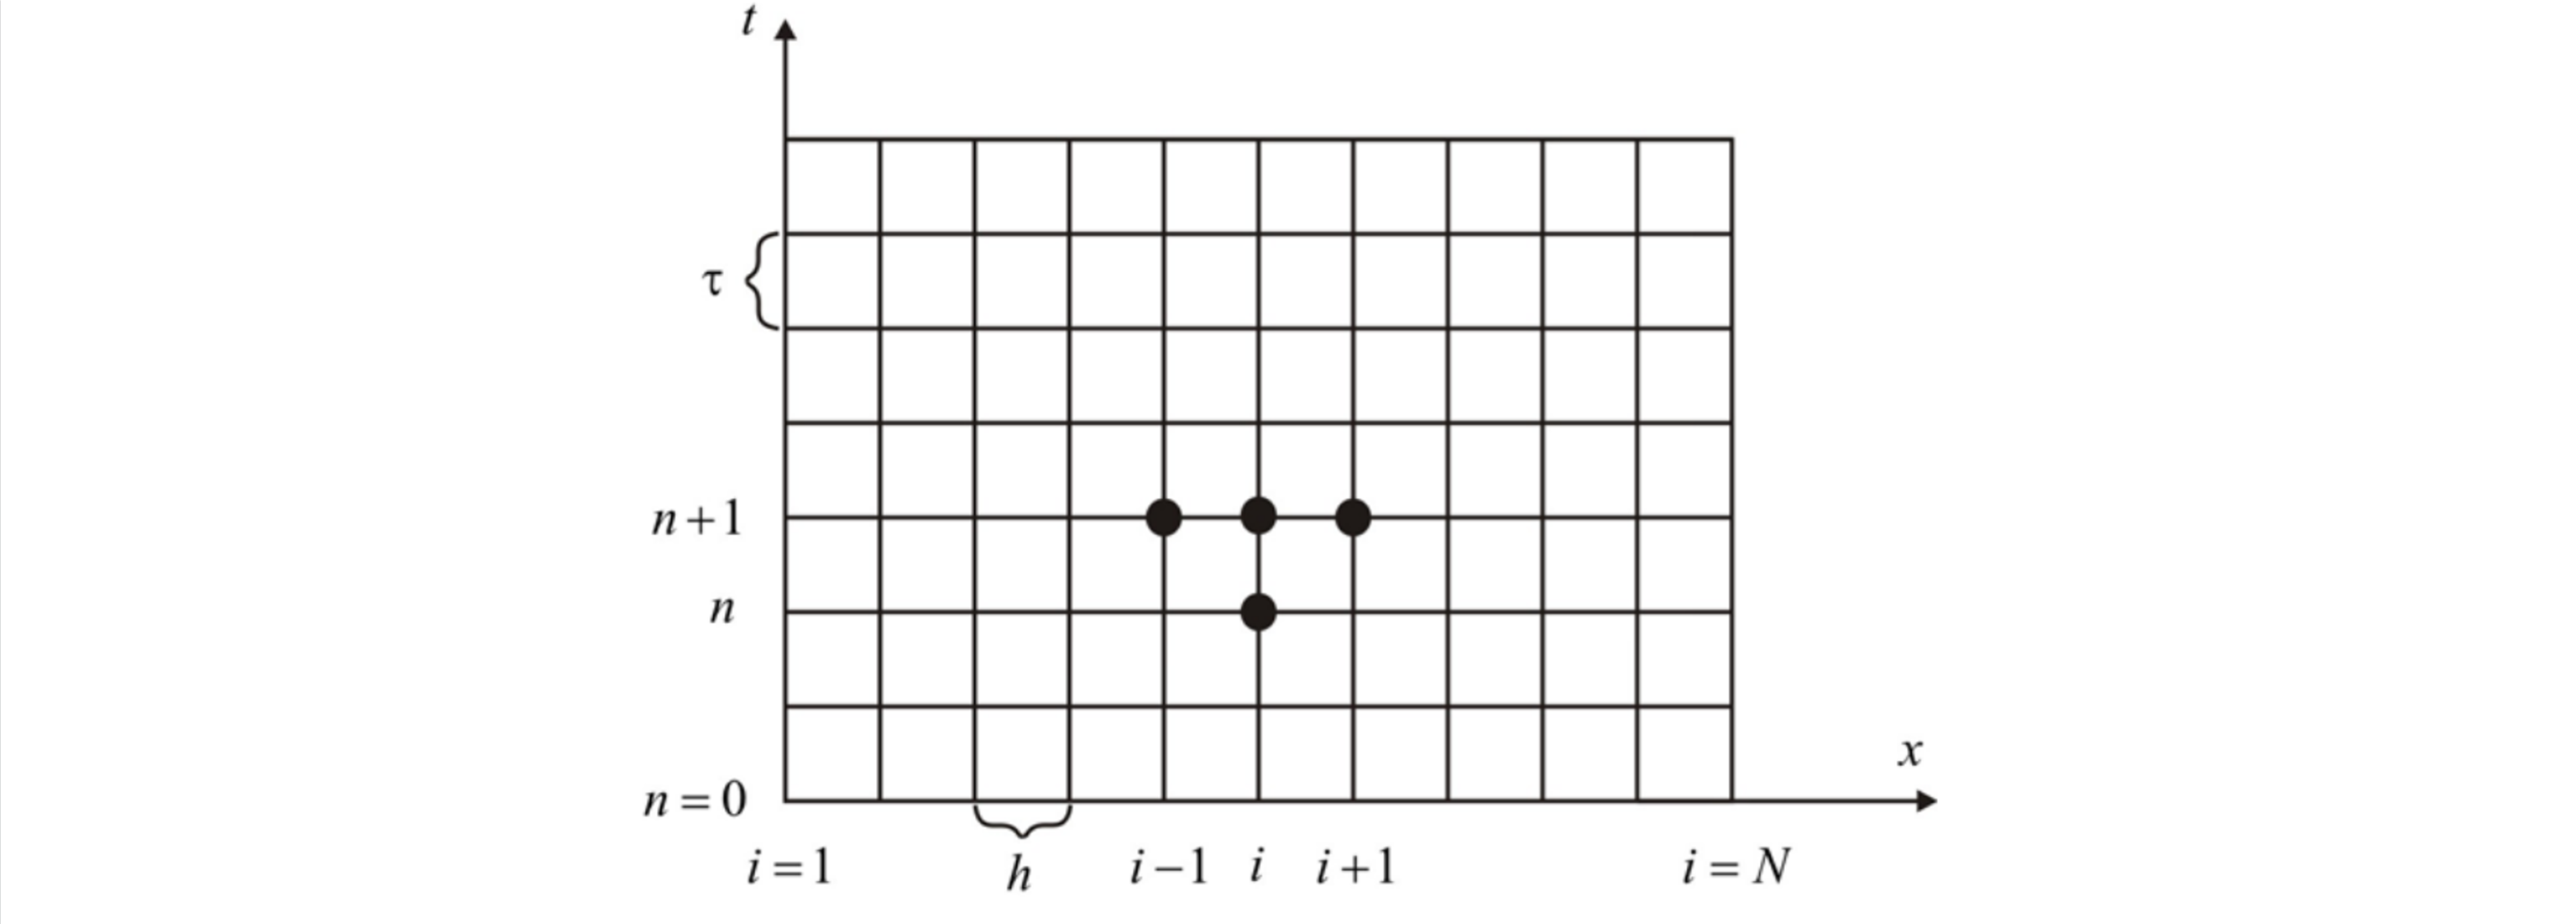
$$ \text{Рис. 2. Шаблон неявной четырёхточечной разностной схемы.} $$

Рисунок наглядно демонстрирует использование четырехточечной разностной схемы, при этом три точки берутся на новом временном слое и одна - со старого временного слоя. Сформулированный выше способ аппроксимации производных называется неявным потому, что поле температуры на новом временном слое представлено неявно, т.е. для его определения необходимо решать систему уравнений.

Полученную систему можно свести к наиболее общему виду:
$$ \qquad \qquad \qquad A_i \cdot T_{i+1}^{n+1} + B_i \cdot T_i^{n+1} + C_i \cdot T_{i-1}^{n+1} = T_i^n \qquad \qquad \qquad \text{(5)}$$ где
$$ A_i = C_i = \frac{-\lambda \tau}{h^2}\text{, } B_i = 1+ \frac{2\lambda \tau}{h^2}. $$

Такие уравнения называют трехточечными разностными уравнениями второго порядка. Система (5) имеет трехдиагональную структуру. В связи с тем, что рассматривается нестационарная задача, систему (5) необходимо решать на каждом шаге по времени.

Предположим, что существуют такие наборы чисел $\alpha_i$ и $\beta_i$ $(i=1, ..., N-1)$, при которых
$$ \qquad \qquad \qquad T_i^{n+1} = \alpha_i \cdot T_{i+1}^{n+1} + \beta_i, \qquad \qquad \qquad \text{(6)}$$
то есть трехточечное уравнение второго порядка (5) преобразуется в двухточечное уравнение первого порядка (6). Уменьшим в связи (6) индекс на единицу и полученное выражение ($ T_{i-1}^{n+1} = \alpha_{i-1} \cdot T_i^{n+1} + \beta_{i-1} $) подставим в (5):
$$ A_i \cdot T_{i+1}^{n+1} + B_i \cdot T_i^{n+1} + C_i \cdot \alpha_{i-1} \cdot T_i^{n+1} + C_i \cdot \beta_{i-1} = T_i^n, $$
откуда получаем
$$ T_i^{n+1} = -\frac{A_i}{B_i + C_i \cdot \alpha_{i-1}}T_{i+1}^{n+1} + \frac{T_i^n - C_i \cdot \beta_{i-1}}{B_i + C_i \cdot \alpha_{i-1}}. $$

Последнее равенство имеет вид (6) и будет точно с ним совпадать, если при всех $i = 2, 3, ..., N-1$ выполняются соотношения
$$ \qquad \qquad \qquad \alpha_i = -\frac{A_i}{B_i + C_i \cdot \alpha_{i-1}}\text{,  } \beta_i = \frac{T_i^n - C_i \cdot \beta_{i-1}}{B_i + C_i \cdot \alpha_{i-1}} \qquad \qquad \qquad \text{(7)}$$
Для определения $\alpha_i$ и $\beta_i$ по (8) необходимо знать $\alpha_1$ и $\beta_1$, которые находятся из левого граничного условия.
Далее по формулам (6) последовательно находятся $T_{N-1}^{n+1}, T_{N-2}^{n+1}, ..., T_2^{n+1}$ при условии, что $T_N^{n+1}$ найдено из правого граничного условия.

Таким образом, решение уравнений вида (5) описываемым способом, называемым методом прогонки, сводится к вычислениям по трем формулам: нахождение так называемых прогоночных коэффициентов $\alpha_i$ и $\beta_i$ по формулам (7) при $i=2, ..., N-1$ (прямая прогонка) и затем получение неизвестных $T_i^{n+1}$ по формуле (6) при $i=N-1, N-2, ..., 2$ (обратная прогонка).
Для успешного применения метода прогонки нужно, чтобы в процессе вычислений не возникло ситуаций с делением на нуль, а при больших размерностях систем не должно быть быстрого роста погрешностей округлений. Будем называть прогонку корректной, если знаменатели прогоночных коэффициентов (7) не обращаются в нуль, и устойчивой, если $|\alpha_i| < 1$ при всех $(i=1, ..., N-1)$.

Воспользуемся теоремой, представляющей достаточные условия корректности и устойчивости прогонки уравнений (5):
$$ \qquad \qquad \qquad |B_i| > |A_i| +|C_i| \quad \forall i=2, ..., N-1\text{ и } |\alpha_1| < 1 \Rightarrow |\alpha_i| < 1, \qquad \qquad \qquad \text{(8)}$$
которые во многих приложениях метода выполняются автоматически. Возвращаясь к системе (4), определим прогоночные коэффициенты и воссоздадим полный алгоритм решения полученной системы.

Поскольку при $x = 0: T = T_0 $, то
$$ T_1^{n+1} = \alpha_1 \cdot T_2^{n+1} + \beta_1 = T_0, $$
$$ \alpha_1 = 0, \beta_1 = T_0, $$
а при $x = L: T = T_L $
$$ T_N^{n+1} = T_L $$

Прогоночные коэффициенты вычисляются по формулам (7). Таким образом, разностные соотношения, аппроксимирующие дифференциальную задачу (2), (3), имеют следующий вид:

$$ \frac{T_i^{n+1} - T_i^n}{\tau} = \lambda \cdot \frac{T_{i+1}^{n+1} - 2T_i^{n+1} + T_{i-1}^{n+1}}{h^2}\text{, } i=2, ..., N-1\text{, } n \geq 0 \qquad \quad \text{(9)}$$
$$ T_i^0 = \varphi (x), \quad i=2, ..., N-1 $$
$$ \qquad \qquad \qquad \qquad \qquad \qquad T_1^n = T_0, \quad n > 0 \qquad \qquad \qquad \qquad \qquad \text{(10)}$$
$$ T_N^n = T_L, \quad n > 0 $$

Аппроксимация дифференциальной задачи (2), (3) конечноразностной (9), (10) выполнена с первым порядком точности по времени $t$ и вторым по пространственной координате $h$. При этом неявная разностная схема является абсолютно устойчивой, т. е. можно проводить интегрирование краевой задачи (2), (3) с любым разностным шагом по времени. Шаг выбирается таким образом, чтобы весь интервал времени разбивался хотя бы на 10 промежутков (желательно больше).

### 3. Построение тестовых примеров.

Итак, задача имеет следующий вид:
\begin{equation*}
    \begin{cases}
        \frac{\partial T}{\partial t} = \lambda \frac{\partial^2 T}{\partial x^2}, \quad 0 < x < L
        \\
        T(x, 0) = \varphi (x),\quad 0 \leq x \leq L
        \\
        T(0, t) = T_0, \qquad t > 0
        \\
        T(L, t) = T_L, \qquad t > 0
    \end{cases}
\end{equation*}

Зададим $ T_0 = T_L = 0 $, в таком случае аналитическое решение задачи может быть найдено методом разделения переменных и представляет собой ряд Фурье:
$$ T(x, t) = \sum\limits_{n=1}^\infty A_n e^{-\left(\frac{\pi n}{L}\right)^2 \lambda t} \cdot \sin\left(\frac{\pi n x}{L}\right), $$
где $ A_n = \frac{2}{L} \int\limits_0^L \varphi(x) \sin\left(\frac{\pi n x}{L}\right) dx $ - коэффициенты ряда Фурье. Функции $ \sin\left(\frac{\pi n x}{L}\right) $ являются собственными функциями первой краевой задачи. Заметим, что если функция $\varphi(x)$ является $p$-ой гармоникой ряда Фурье, то в силу ортогональности системы синусов коэффициенты
\begin{equation*}
    A_n = 
    \begin{cases}
        0\text{, если } n \neq p
        \\
        \frac{2}{L} \int\limits_0^L \sin^2\left(\frac{\pi p x}{L}\right) dx = 1\text{, если } n = p
    \end{cases}
\end{equation*}
Тогда решение задачи будет представляться не бесконечным рядом, а функцией вида $ T(x, t) = \sin\left(\frac{\pi p x}{L}\right) \cdot e^{-\left(\frac{\pi p}{L}\right)^2 \lambda t} $

**Тестовый пример 1.**
\begin{equation*}
    \begin{cases}
        \frac{\partial T}{\partial t} = \lambda \frac{\partial^2 T}{\partial x^2}, \quad 0 < x < L
        \\
        T(x, 0) = \sin(\pi x),\quad 0 \leq x \leq L
        \\
        T(0, t) = T(L, t) = 0, \qquad t > 0
    \end{cases}
\end{equation*}

Это задача с однородными краевыми условиями. Температура в начальный момент времени задана 1-й гармоникой ряда Фурье. В данном тестовом примере зададим $\lambda = 1$. Длина стержня $L=1$, следовательно, решение имеет вид $ T(x, t) = \sin(\pi x) \cdot e^{-\pi^2 t} $.   
Построим профили температуры - графики функции $T(x, t)$ в фиксированные моменты времени. Пусть $t_0 = 0$, $t_1 = 0.01$, $t_2 = 0.1$, $t_3 = 1$.
$$ T(x, t_0) = \sin(\pi x) $$
$$ T(x, t_1) = \sin(\pi x) \cdot e^{-\pi^2 \cdot 0.01} = 0.906018 \cdot \sin(\pi x) $$
$$ T(x, t_2) = \sin(\pi x) \cdot e^{-\pi^2 \cdot 0.1} = 0.372708 \cdot \sin(\pi x) $$
$$ T(x, t_3) = \sin(\pi x) \cdot e^{-\pi^2} = 5.2 \cdot 10^{-5} \cdot \sin(\pi x) $$

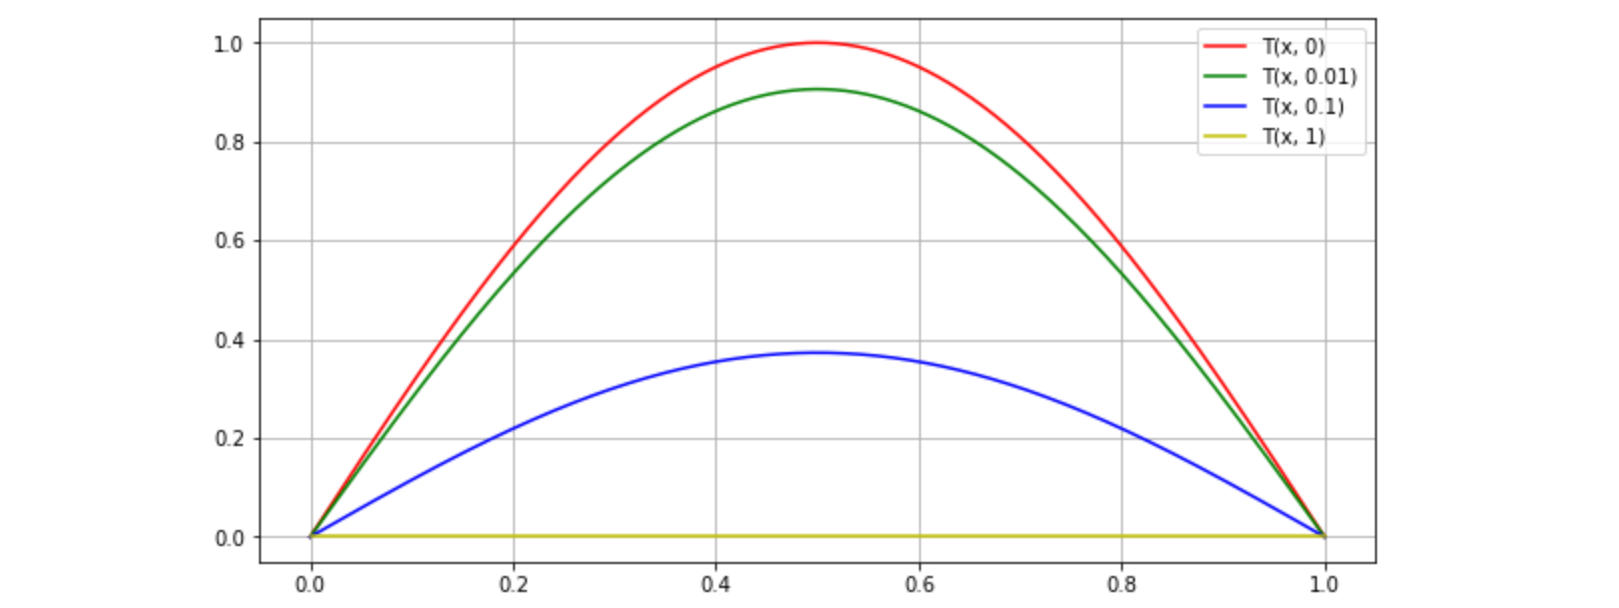
$$ \text{Рис. 3. Тестовый пример 1 - графики функции T(x, t) при различных t.} $$

**Тестовый пример 2.**
\begin{equation*}
    \begin{cases}
        \frac{\partial T}{\partial t} = \lambda \frac{\partial^2 T}{\partial x^2}, \quad 0 < x < L
        \\
        T(x, 0) = \sin(\pi x),\quad 0 \leq x \leq L
        \\
        T(0, t) = T(L, t) = 0, \qquad t > 0
    \end{cases}
\end{equation*}

Рассмотрим ту же самую задачу, только уже с коэффициентом $\lambda = \frac{3}{98560}$ - как в исходной задаче. Решение имеет вид $ T(x, t) = \sin(\pi x) \cdot e^{-\pi^2 \lambda t} $.
Построим профили температуры - графики функции $T(x, t)$ в фиксированные моменты времени. Пусть $t_0 = 0$, $t_1 = 100$, $t_2 = 1000$, $t_3 = 10000$.
$$ T(x, t_0) = \sin(\pi x) $$
$$ T(x, t_1) = \sin(\pi x) \cdot e^{-\pi^2 \cdot \frac{3}{98560} \cdot 100} = 0.970405 \cdot \sin(\pi x) $$
$$ T(x, t_2) = \sin(\pi x) \cdot e^{-\pi^2 \cdot \frac{3}{98560} \cdot 1000} = 0.740512 \cdot \sin(\pi x) $$
$$ T(x, t_3) = \sin(\pi x) \cdot e^{-\pi^2 \cdot \frac{3}{98560} \cdot 10000} = 0.0495813 \cdot \sin(\pi x) $$

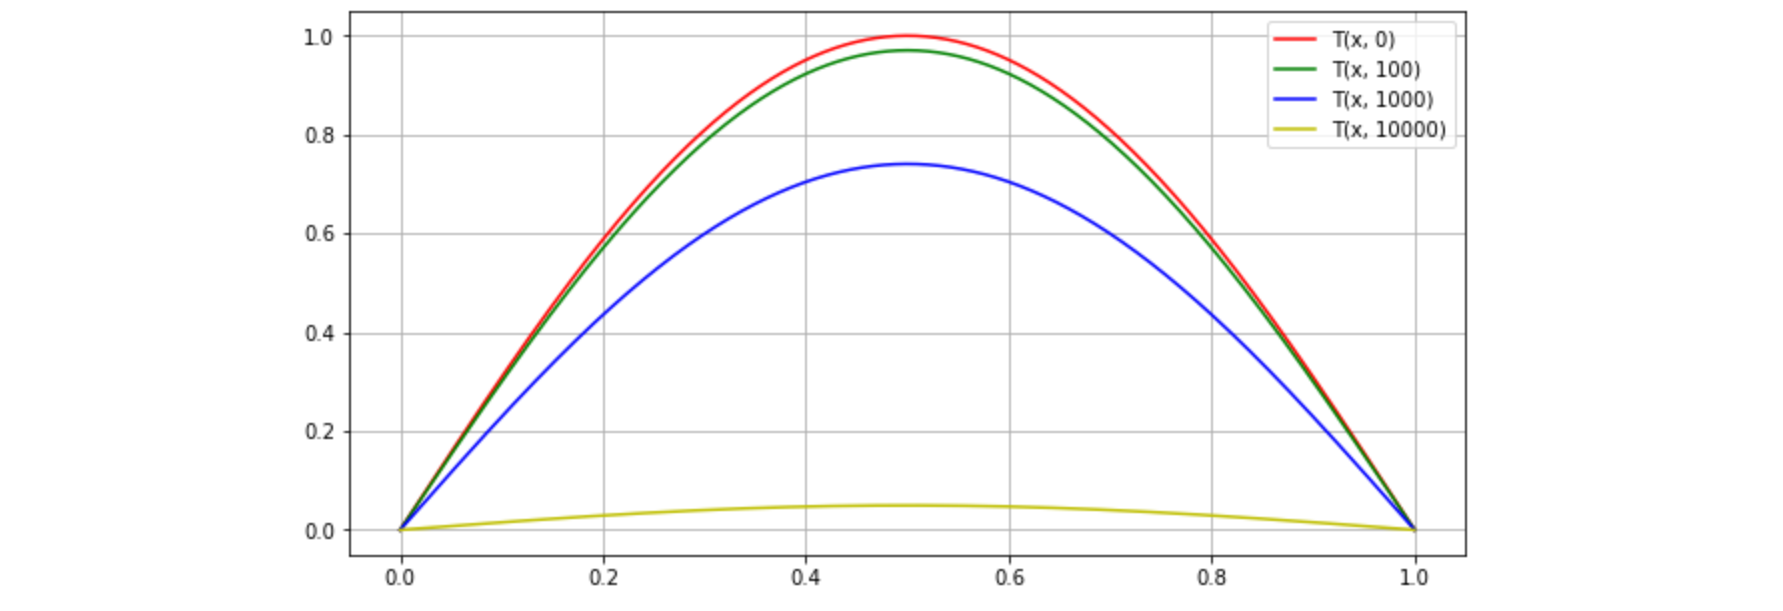
$$ \text{Рис. 4. Тестовый пример 2 - графики функции T(x, t) при различных t.} $$

### 4. Получение аналитического решения для исходной задачи.

Если же взять данные моего варианта: $ T_0 = 0$, $ T_L = 100 $, то получаем задачу с неоднородными краевыми условиями. От этой задачи нетрудно перейти к уже рассмотренной выше задаче с однородными условиями, произведя замену.
Сделаем замену следующим образом: $ T = T^* + 100x $, тогда $ T^* (x, 0) = \varphi(x) - 100x = \varphi^*(x) $. Получаем:
\begin{equation*}
    \begin{cases}
        \frac{\partial T^* }{\partial t} = \lambda \frac{\partial^2 T^* }{\partial x^2}, \quad 0 < x < L
        \\
        T^* (x, 0) = \varphi^* (x),\quad 0 \leq x \leq L
        \\
        T^* (0, t) = 0, \qquad t > 0
        \\
        T^* (L, t) = 0, \qquad t > 0
    \end{cases}
\end{equation*}

Аналитическое решение представляет собой ряд Фурье:
$$ T^*(x, t) = \sum\limits_{n=1}^\infty A_n e^{-\left(\frac{\pi n}{L}\right)^2 \lambda t} \cdot \sin\left(\frac{\pi n x}{L}\right) $$

Удовлетворим начальному условию:
$$ T^*(x, 0) = \sum\limits_{n=1}^\infty A_n \cdot \sin\left(\frac{\pi n x}{L}\right) = \varphi(x) - 100x $$

Положим $ \varphi(x) = 100 $. Тогда:   
$ A_n = \frac{2}{L} \int\limits_0^L \varphi^*(x) \sin\left(\frac{\pi n x}{L}\right) dx = 2 \int\limits_0^1 (100 - 100x) \sin(\pi n x) dx = $   
$ = 200 \left( \int\limits_0^1 \sin(\pi n x) dx - \int\limits_0^1 x \sin(\pi n x) dx \right) = \frac{200}{\pi n} - \frac{200\sin(\pi n)}{\pi^2 n^2} $

Поскольку $ n \in \mathbb{N} $, второе слагаемое равно нулю $ \forall n $. Подставим полученное $A_n$ в аналитическое решение, получим:
$$ T^*(x, t) = \sum\limits_{n=1}^\infty \frac{200}{\pi n} e^{-\pi^2 n^2 \lambda t} \cdot \sin(\pi n x) $$

Тогда решение исходной задачи будет:
$$ T(x, t) = T^*(x, t) + 100x = \sum\limits_{n=1}^\infty \frac{200}{\pi n} e^{-\pi^2 n^2 \lambda t} \cdot \sin(\pi n x) + 100x $$

С физической точки зрения приведенное краевое условие означает, что стержень нагревается или охлаждается только с одного конца. При больших временах полученное решение стремится к линейной функции.   
Построим профили температуры - графики функции $T(x, t)$ в фиксированные моменты времени. Пусть $t_0 = 0$, $t_1 = 100$, $t_2 = 1000$, $t_3 = 10000$. В момент времени $t_0$ наблюдаем резкий скачок с 0 до 100 градусов - все потому, что в данном примере была выбрана начальная температура у всего стержня - $100^{\circ}C$, кроме самой левой точки - там $T=0$.

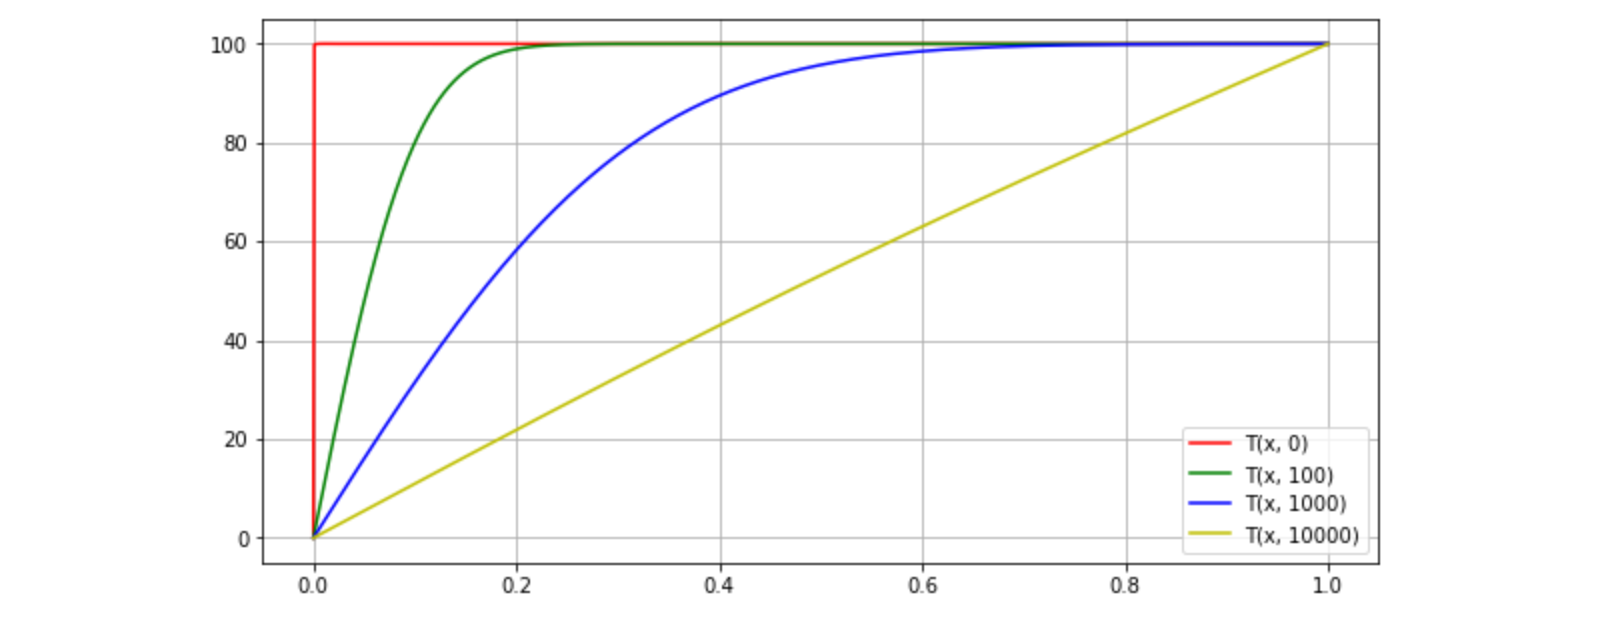
$$ \text{Рис. 5. Исходная задача - графики функции T(x, t) при различных t.} $$

### 5. Результаты расчетов по тестовым примерам.

Применим неявный метод прогонки к тестовым примерам и сравним полученные решения с точными. Я реализовал метод в двух разных средах: в Microsoft Excel с помощью стандартных функций и непосредственно на Python. В своей работе приведу результаты вычислений в обоих средах.

1. Описание реализации в Microsoft Excel.   
Построил трехдиагональную квадратную матрицу размером $1001$x$1001$, так как шаг был выбран $h=0.001$. Заполнил столбец с температурой стержня во всех 1001 точках в начальный момент времени. Для каждой временной отсечки было рассчитано температурное распределение в стержне по формуле `=МУМНОЖ(МОБР(<диапазон ячеек матрицы>); <диапазон ячеек вектора T>)`.


2. Описание реализации на Python.   
Решение было реализовано с использованием библиотек NumPy и Matplotlib. Были заданы исходные данные, написаны необходимые функции: функция начального распределения температуры, функция иниализации списка значений температуры, функция неявного метода прогонки и функция точного решения для сравнения с приближенным. Далее применил метод прогонки и создал список списков значений температуры в каждой точке стержня с шагом $h=0.01$ в каждый момент времени с шагом $\tau = 100$. Далее получил точные решения и построил графики решений и погрешности.

Во всех тестовых примерах и в исходной задаче графики как по данным из Excel, так и по данным из Python получились абсолютно неотличимы друг от друга, поэтому далее буду приводить их в одном экземпляре.

**Тестовый пример 1.**   
Временной шаг был выбран $t=0.01$. Построим на одном чертеже графики точного и приближенного решения в моменты времени $t=0$, $t=0.01$, $t=0.1$, $t=1$, а на другом чертеже графики абсолютной погрешности метода прогонки.
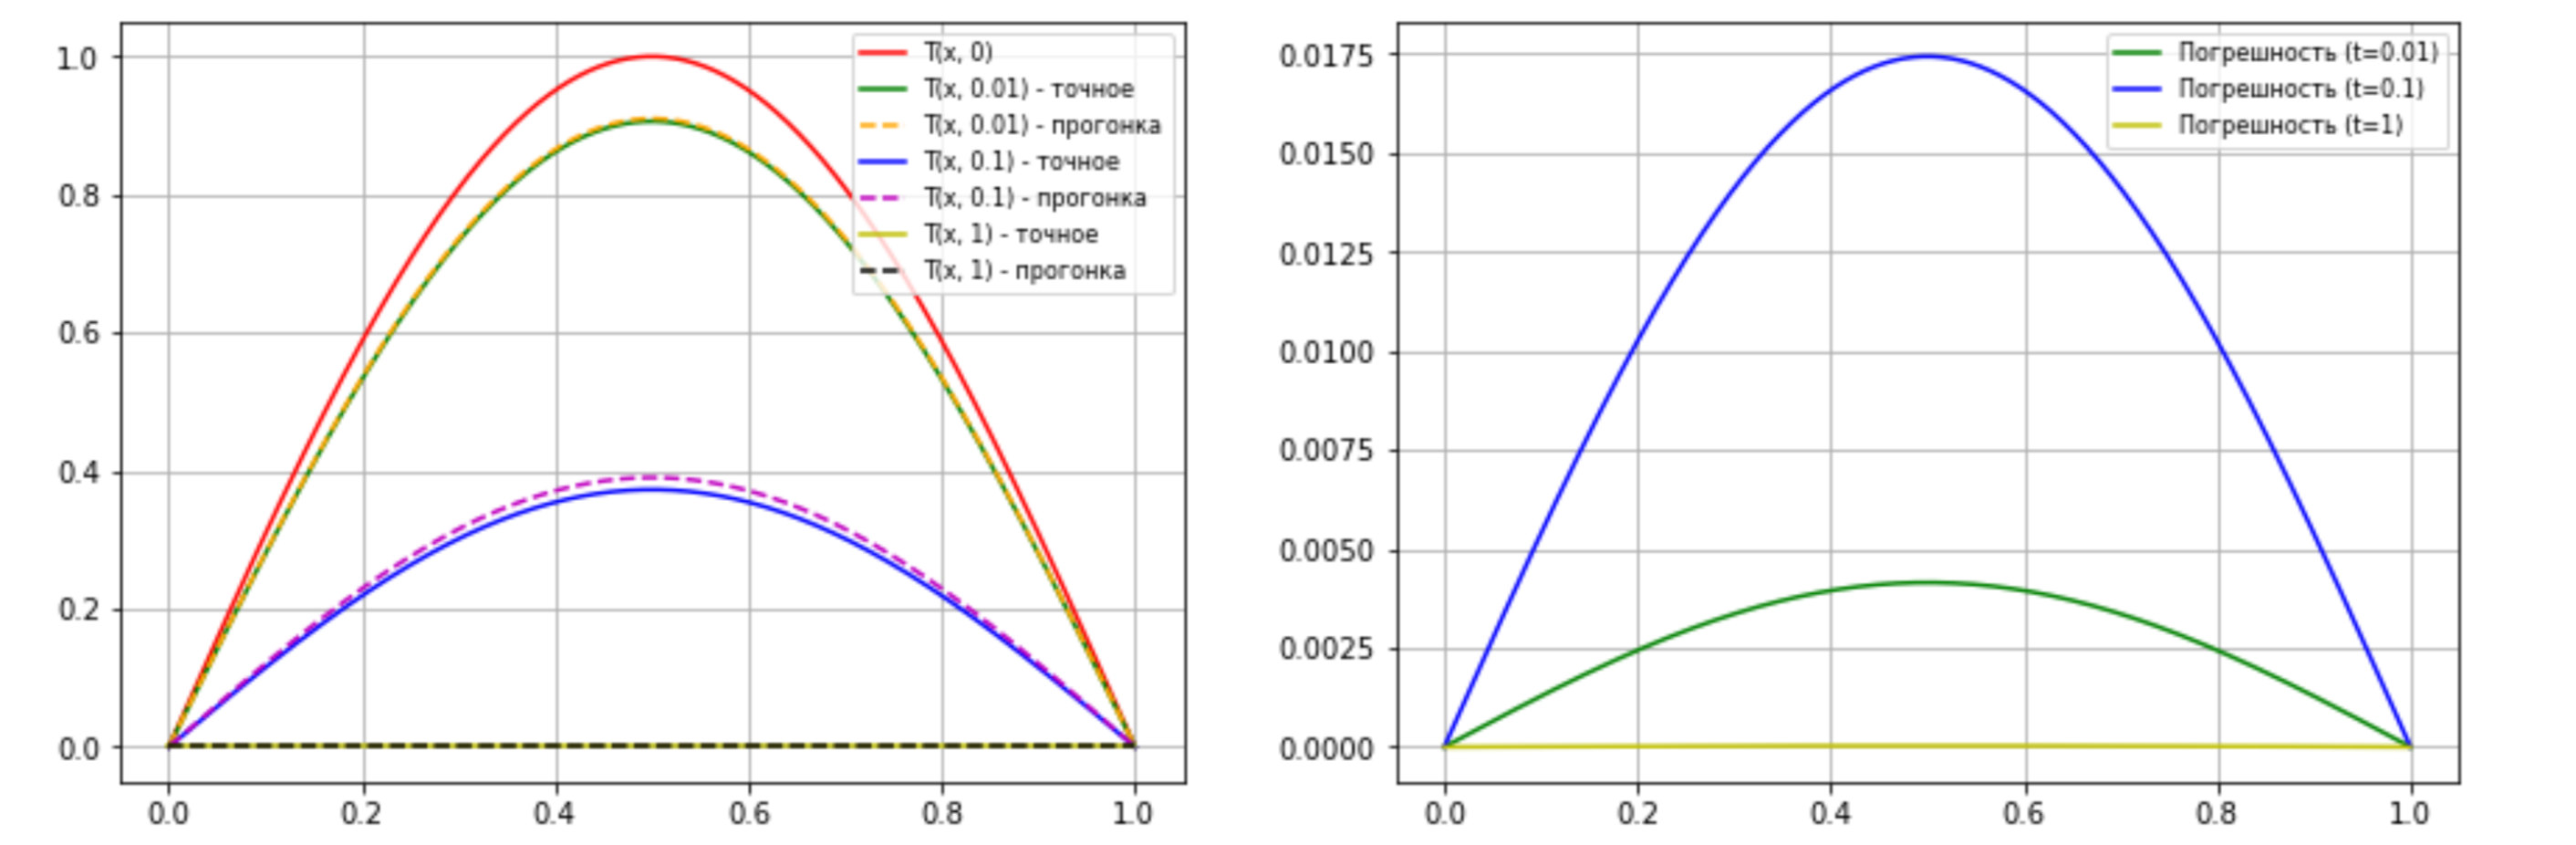
$$ \text{Рис. 6. Тестовый пример 1 - сравнение точного решения и приближенного.} $$

**Тестовый пример 2.**   
Временной шаг был выбран $t=100$. Построим на одном чертеже графики точного и приближенного решения в моменты времени $t=0$, $t=100$, $t=1000$, $t=10000$, а на другом чертеже графики абсолютной погрешности метода прогонки.
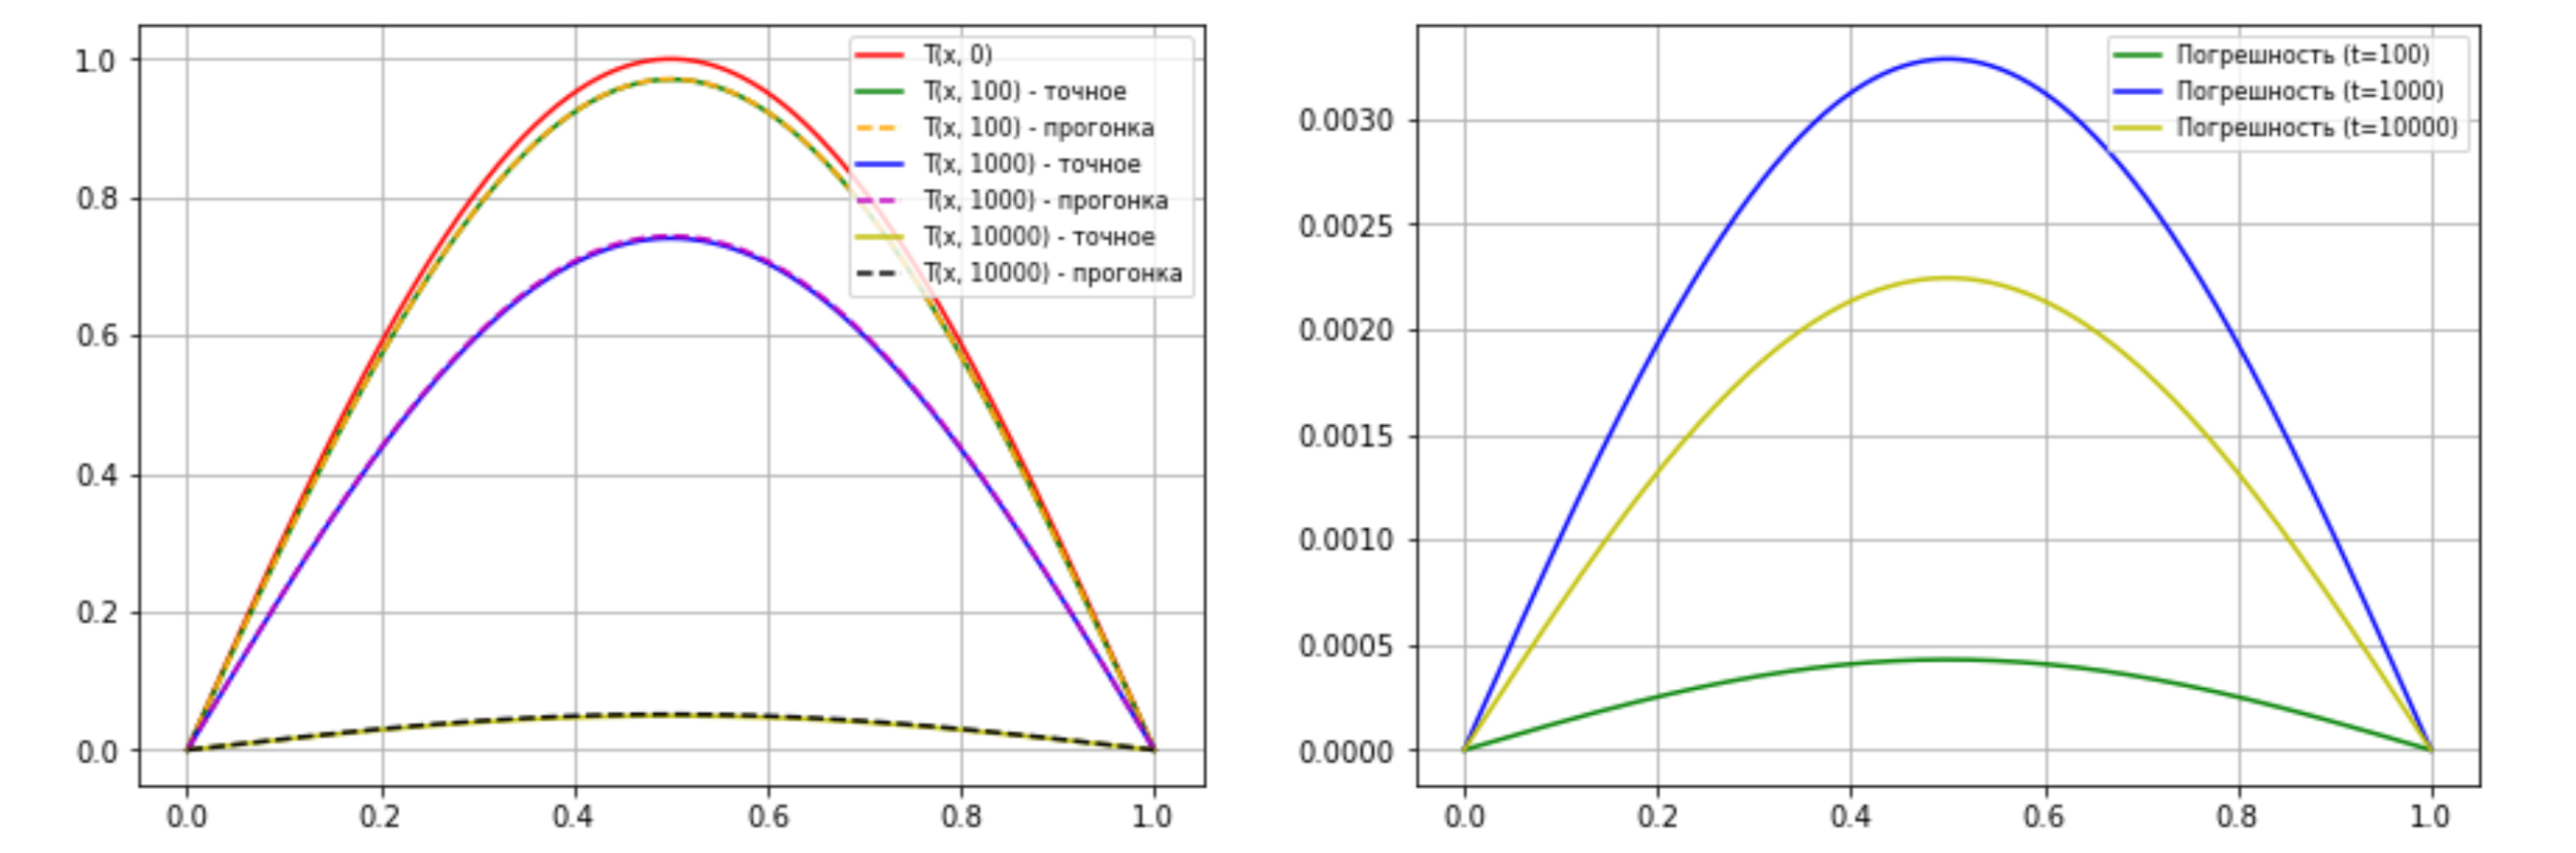
$$ \text{Рис. 7. Тестовый пример 2 - сравнение точного решения и приближенного.} $$

### 6. Результаты расчетов для исходной задачи.

Временной шаг был выбран $t=100$. Построим графики точного решения и решения по методу прогонки, а также графики погрешности в моменты времени $t=0$, $t=100$, $t=1000$, $t=10000$.
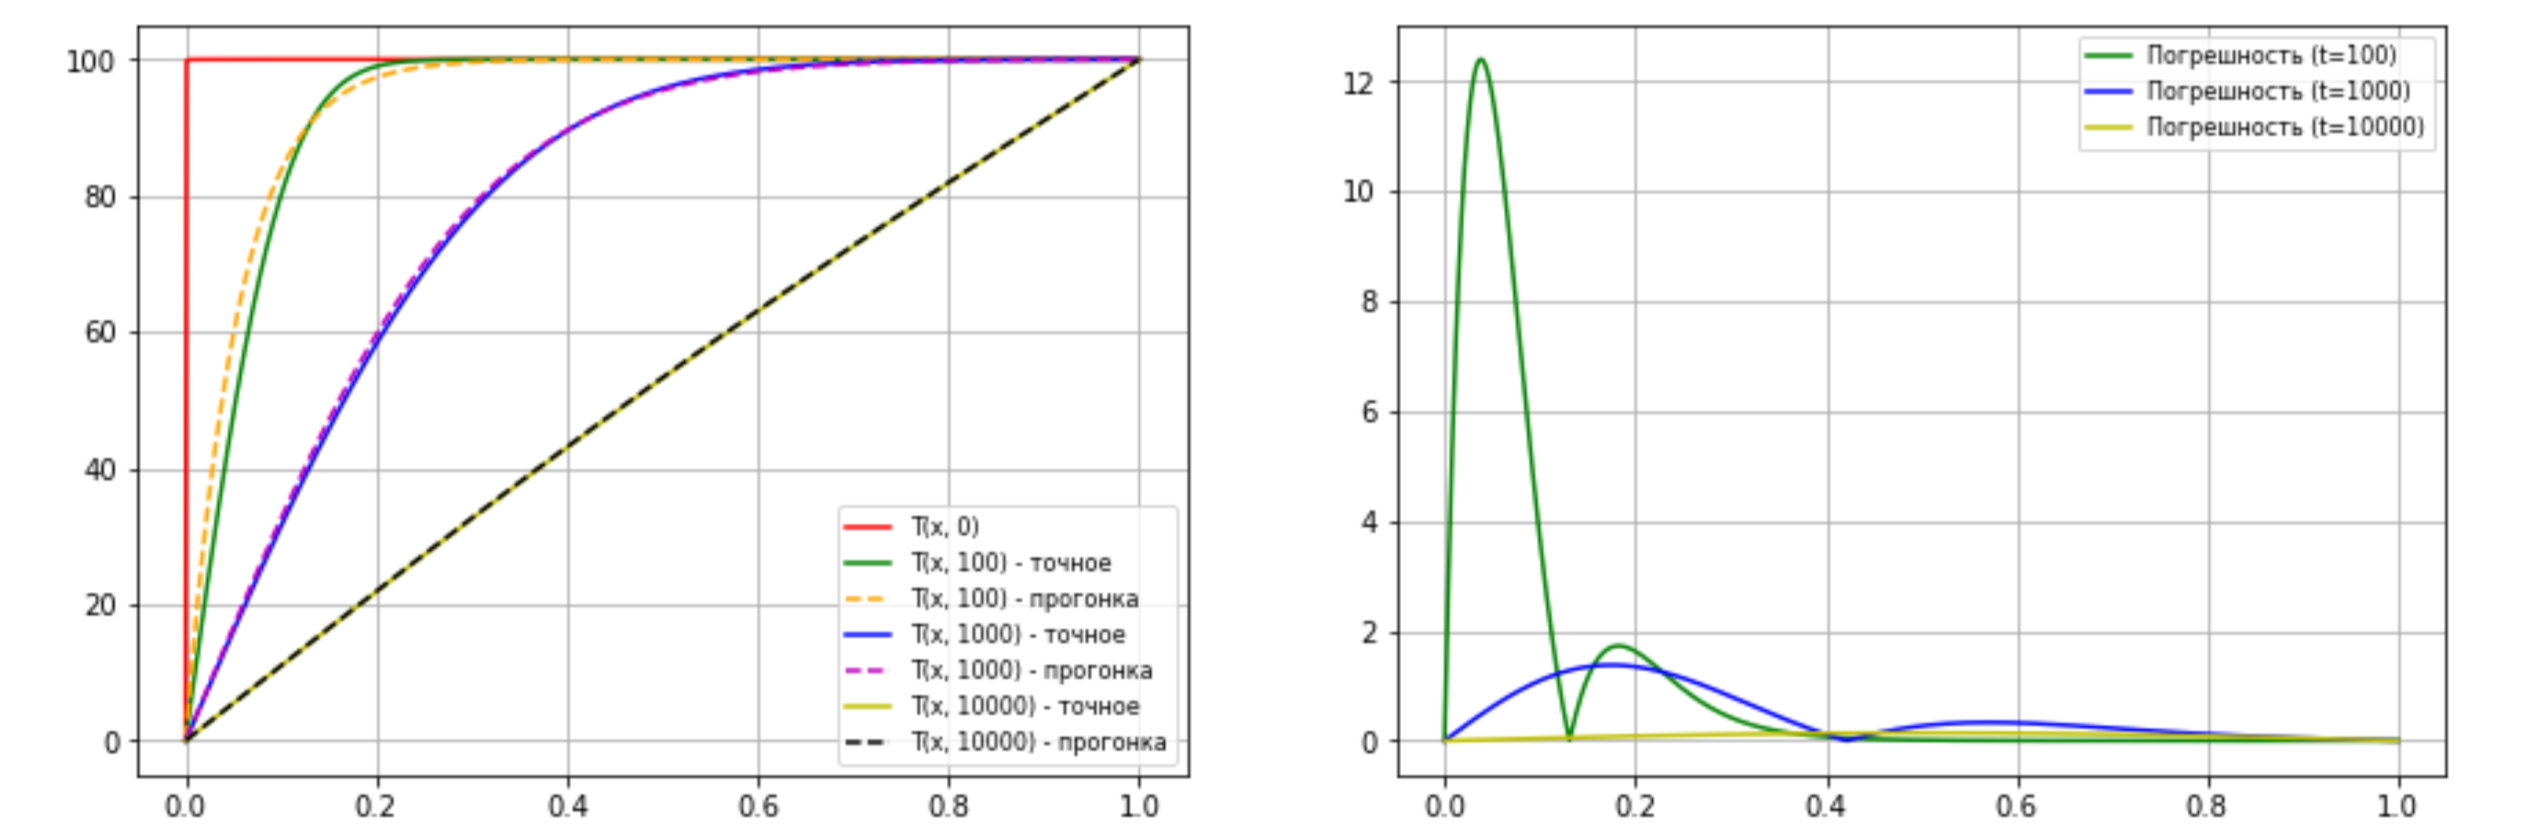
$$ \text{Рис. 8. Исходная задача - сравнение точного решения и приближенного.} $$

### 7. Анализ полученных результатов.

Тестовые примеры 1 и 2 были выбраны таким образом, чтобы в них отличался только коэффициент температуропроводности $\lambda$. Исходя из полученных результатов и анализа графиков, можно сделать следующий вывод: металлический стержень нагревается/охлаждается тем быстрее, чем больше у него коэффициент температуропроводности.

Неявный метод прогонки, как реализованный в Microsoft Excel, так и написанный на языке Python, дал результаты, близкие к точным и с минимальной погрешностью, причем чем больше итераций метода прогонки было совершено, тем более высокую точность удавалось получить. При этом графики, построенные по данным из Excel и по данным из Python получились совершенно неотличимыми друг от друга. Это свидетельствует о том, что метод был построен верно.

В итоге было получено решение исходной задачи. Поскольку начальное условие не было задано, оно было выбрано мной самостоятельно.   
Итак, для задачи
\begin{equation*}
    \begin{cases}
        \frac{\partial T}{\partial t} = \frac{3}{98560} \cdot \frac{\partial^2 T}{\partial x^2}, \quad 0 < x < L
        \\
        T(x, 0) = 100,\quad 0 \leq x \leq L
        \\
        T(0, t) = 0, \qquad t > 0
        \\
        T(L, t) = 100, \qquad t > 0
    \end{cases}
\end{equation*}
было получено точное решение $$ T(x, t) = \sum\limits_{n=1}^\infty \frac{200}{\pi n} e^{-\pi^2 n^2 \lambda t} \cdot \sin(\pi n x) + 100x. $$
Были построены графики точного решения и приближенного, полученного по методу прогонки, а также график абсолютной погрешности приближенного решения. Из графика видно, что погрешность с течением времени уменьшается в разы.

### 8. Код с комментариями.

In [108]:
import numpy as np
from matplotlib import pyplot as plt

In [109]:
# Исходные данные
density = 2800
capacity = 880
coef_thermal_conductivity = 75
N = 1001
T_0, T_L = 0, 100
x_0, x_L = 0, 1
x_lst = np.linspace(x_0, x_L, N)
tau = 100
t_lst = np.arange(0, 10000, tau)
lambd = coef_thermal_conductivity / (density * capacity)
h = (x_L - x_0) / (N - 1)
A = - lambd * tau / h ** 2
B = 1 + 2 * lambd * tau / h ** 2
C = A

In [110]:
# Функции для решения поставленной задачи
# Начальное условие (температура в момент времени t=0)
def phi_0(x):
    return np.where(x == 0, 0, 100)

# Инициализация списка значений температуры
# в каждой точке стержня в момент времени t=0
def init(phi_0, h, N):
    T_x_0 = np.zeros(N)
    for i in range(N):
        x = h * i
        T_x_0[i] = phi_0(x)
    return T_x_0

# Неявный метод прогонки
def tdma(A, B, C, T, tau, N, T_0, T_L):
    a_prev = 0
    b_prev = T_0
    lst = [(a_prev, b_prev)]
    for i in range(1, N-1):
        a_cur = - A / (B + C * a_prev)
        b_cur = (T[i] - C * b_prev) / (B + C * a_prev)
        lst.append((a_cur, b_cur))
        a_prev, b_prev = a_cur, b_cur
    T[N-1] = T_L
    for i in range(N-2, -1, -1):
        T[i] = lst[i][0]*T[i+1] + lst[i][1] 
    return T.tolist()

# Точное решение
def T(x, t, n):
    return (200 / (np.pi * n) * np.exp(-np.pi**2 * n**2 * 3 / 98560 * t) *
            np.sin(np.pi * n * x))

In [111]:
# Применяем неявный метод прогонки, создаем список списков значений
# температуры в каждой точке с временным шагом tau = 100 
T_x_0 = init(phi_0, h, N)
T_x_t = []
for _ in t_lst:
    T_x_t.append(tdma(A, B, C, T_x_0, tau, N, T_0, T_L))

In [112]:
# Получение точных решений
T_sum_0, T_sum_100, T_sum_1000, T_sum_10000 = 0, 0, 0, 0
for n in range(1, 100000):
    T_sum_0 += T(x, 0, n)
    T_sum_100 += T(x, 100, n)
    T_sum_1000 += T(x, 1000, n)
    T_sum_10000 += T(x, 10000, n)

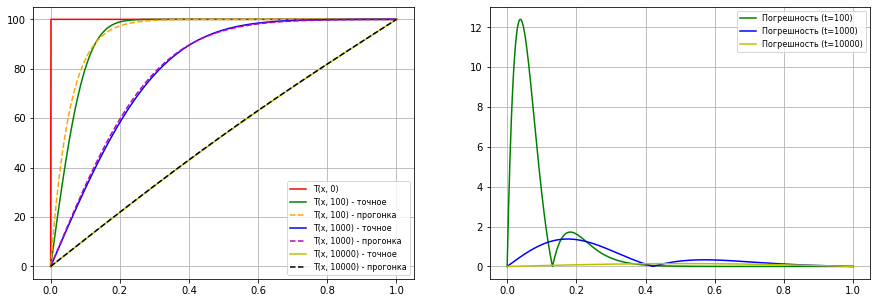

In [113]:
# Построение графика
x = np.linspace(0, 1, N)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x, phi_0(x), color='r', label='T(x, 0)')
axs[0].plot(x, T_sum_100 + 100*x, color='g',
            label='T(x, 100) - точное')
axs[0].plot(x, T_x_t[0], color='orange', linestyle='--',
            label='T(x, 100) - прогонка')
axs[0].plot(x, T_sum_1000 + 100*x, color='b',
            label='T(x, 1000) - точное')
axs[0].plot(x, T_x_t[9], color='m', linestyle='--',
            label='T(x, 1000) - прогонка')
axs[0].plot(x, T_sum_10000 + 100*x, color='y',
            label='T(x, 10000) - точное')
axs[0].plot(x, T_x_t[99], color='k', linestyle='--',
            label='T(x, 10000) - прогонка')
axs[0].legend(loc=4, fontsize=8)
axs[0].grid()
axs[1].plot(x, abs(T_sum_100 + 100*x - T_x_t[0]), color='g',
            label='Погрешность (t=100)')
axs[1].plot(x, abs(T_sum_1000 + 100*x - T_x_t[9]), color='b',
            label='Погрешность (t=1000)')
axs[1].plot(x, abs(T_sum_10000 + 100*x - T_x_t[99]), color='y',
            label='Погрешность (t=10000)')
axs[1].legend(loc=1, fontsize=8)
axs[1].grid()